In [ ]:
# dataset 다운로드
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'andrewahn00' # username
os.environ['KAGGLE_KEY'] = '9114b7ee9fe5b5223a82efce234ff445' # key

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip -q cat-and-dog.zip

100% 218M/218M [00:10<00:00, 24.6MB/s]
100% 218M/218M [00:10<00:00, 22.0MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)), # scale(규모): 0.8 ~ 1.2 => 20%를 줄이거나 20%를 키우는 범위까지
        transforms.RandomHorizontalFlip(), # 좌우 반전을 시킨다.
        transforms.ToTensor() # 이미지를 tensor 형태로 변환
    ]),
    'validation' : transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
}

# Compose 함수는 여러 개의 변환 함수를 순차적으로 적용하여 하나의 변환 함수로 결합한다.
# => 데이터에 대해 연속적인 변환을 적용할 수 있다.


In [ ]:
def target_transforms(target):
  return torch.FloatTensor([target])

In [ ]:
image_datasets = {
    'train': datasets.ImageFolder('training_set/training_set', data_transforms['train'], target_transform=target_transforms), # 특정 이미지 폴더를 dataset화 시킨다.
    # train 데이터를 가져와서 data_transforms의 train처럼 변형을 시킨다.
    # target_transforms는 함수의 이름만 들어간다.
    'validation': datasets.ImageFolder('test_set/test_set', data_transforms['validation'], target_transform=target_transforms)
}

# DataLoader 생성
dataloaders = {
    'train' : DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation' : DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

print(len(image_datasets['train']), len(image_datasets['validation']))

8005 2023


In [ ]:
imgs, labels = next(iter(dataloaders['train']))
print(next(iter(dataloaders['train'])))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.5137, 0.4941, 0.4980],
          [0.0000, 0.0000, 0.0000,  ..., 0.5216, 0.5020, 0.4941],
          [0.0000, 0.0000, 0.0000,  ..., 0.5451, 0.5216, 0.5020],
          ...,
          [0.7255, 0.7294, 0.7216,  ..., 0.0000, 0.0000, 0.0000],
          [0.7294, 0.7451, 0.7294,  ..., 0.0000, 0.0000, 0.0000],
          [0.7216, 0.7216, 0.7176,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.5961, 0.5765, 0.5804],
          [0.0000, 0.0000, 0.0000,  ..., 0.6039, 0.5843, 0.5765],
          [0.0000, 0.0000, 0.0000,  ..., 0.6275, 0.6039, 0.5843],
          ...,
          [0.6902, 0.6941, 0.6863,  ..., 0.0000, 0.0000, 0.0000],
          [0.6941, 0.7098, 0.6941,  ..., 0.0000, 0.0000, 0.0000],
          [0.6863, 0.6863, 0.6824,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.3725, 0.3529, 0.3569],
          [0.0000, 0.0000, 0.0000,  ..., 0.3804, 0.3608, 0.3529],
          [0.0000, 0.0000, 0.0000,  ..., 

tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([1.])


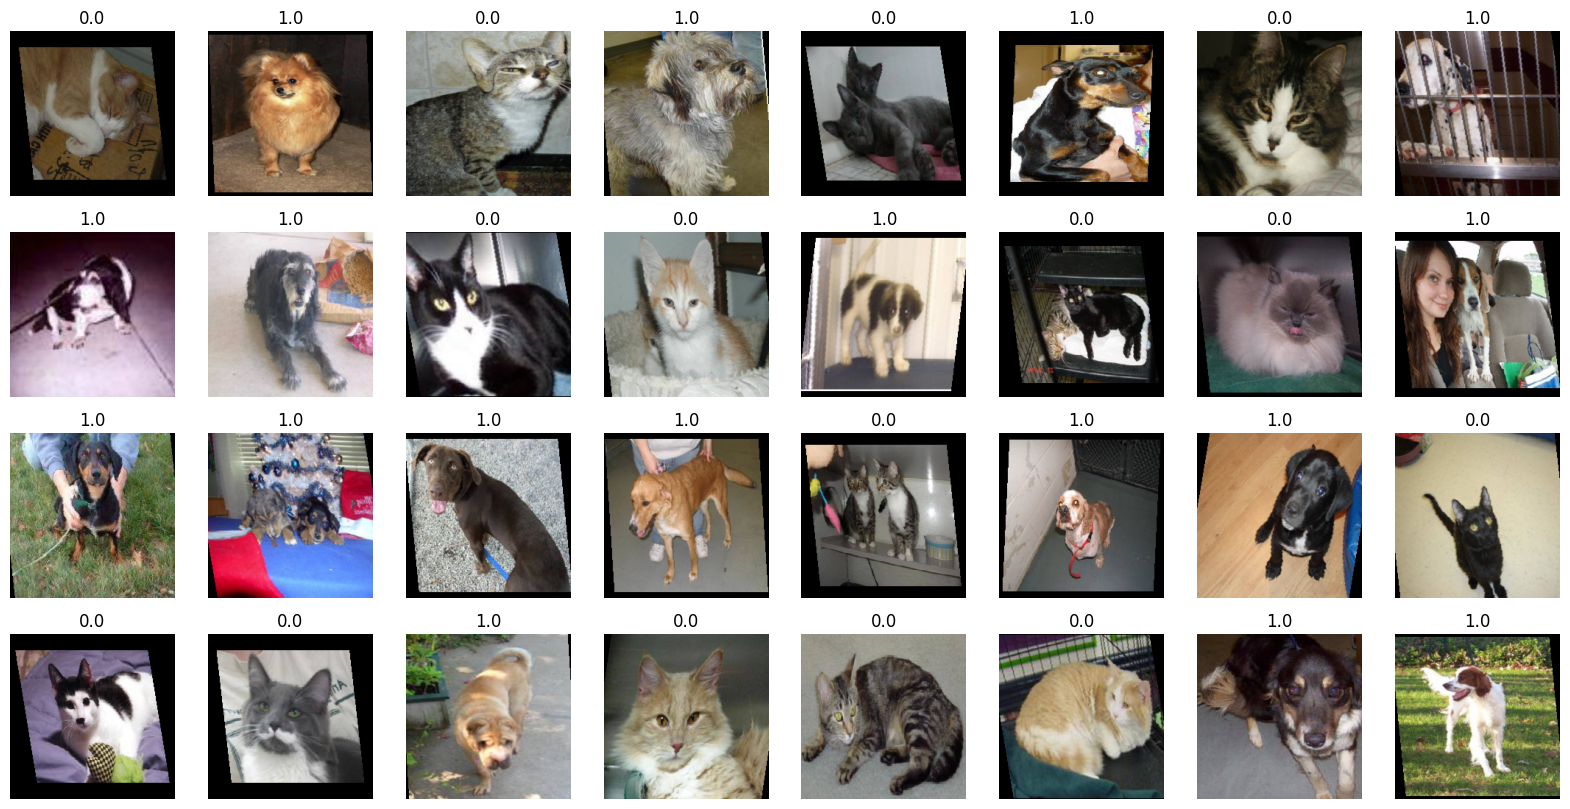

In [ ]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for img, label, ax in zip(imgs, labels, axes.flatten()):
  print(label)
  ax.set_title(label.item())
  ax.imshow(img.permute(1, 2, 0))
  ax.axis('off')

In [ ]:
# model = models.resnet50(pretrained=True).to(device) => 아래와 같은 의미이다.
model = models.resnet50(weights='IMAGENET1K_V1').to(device)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 146MB/s]


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for param in model.parameters():
  param.requires_grad = False # 가져온 파라미터(W, b)를 업데이트 하지 않는다.

# 에일리언 혹은 프레데터인지 1개만 나와야 하는데 사진에서는 1000개로 나오게 만들어져 있으므로 둘 중에 하나로 선택하도록 바꿔준다.
model.fc = nn.Sequential( # head쪽만 수정이 가능해진다.
    nn.Linear(2048, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
).to(device)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 학습: fc 부분만 학습하므로 속도가 빠르다.
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
# Adam optimizer를 사용하여 모델의 fc (fully connected) 부분의 파라미터를 학습

epochs = 10
for epoch in range(epochs):
  for phase in ['train', 'validation']: # validation과 train에 대해서 진행을 한다.
    if phase == 'train':
      model.train() # 모델을 학습 모드로 설정
    else:
      model.eval() # 모델을 평가 모드로 설정

    sum_losses = 0 # loss의 합을 0으로 초기화
    sum_accs = 0 # acc의 합을 0으로 초기화

    for x_batch, y_batch in dataloaders[phase]:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      y_pred = model(x_batch)

      loss = nn.BCELoss()(y_pred, y_batch)

      if phase == 'train':
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      sum_losses = sum_losses + loss.item()

      y_bool = (y_pred >= 0.5).float()
      acc = (y_batch == y_bool).float().sum() / len(y_batch) * 100
      sum_accs = sum_accs + acc.item()

    avg_loss = sum_losses / len(dataloaders[phase])
    avg_acc = sum_accs / len(dataloaders[phase])

    print(f'{phase:10s}: Epoch {epoch+1:4d} / {epoch}, Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.2f}%')
# model.train()으로 돌리면 optimizer가 메모리에 들어간다.
# => 학습 모드로 들어간다.
# eval의 경우 optimizer의 메모리를 지우고 train에서 사용한 메모리를 삭제한다.
# => 훨씬 빠른 속도로 테스트를 할 수 있다.

train     : Epoch    1 / 0, Loss: 0.1409, Accuracy: 94.43%
validation: Epoch    1 / 0, Loss: 0.0715, Accuracy: 97.31%
train     : Epoch    2 / 1, Loss: 0.0993, Accuracy: 96.09%
validation: Epoch    2 / 1, Loss: 0.0405, Accuracy: 98.63%
train     : Epoch    3 / 2, Loss: 0.0816, Accuracy: 96.85%
validation: Epoch    3 / 2, Loss: 0.0455, Accuracy: 98.29%
train     : Epoch    4 / 3, Loss: 0.0796, Accuracy: 96.84%
validation: Epoch    4 / 3, Loss: 0.0455, Accuracy: 98.58%
train     : Epoch    5 / 4, Loss: 0.0772, Accuracy: 97.02%
validation: Epoch    5 / 4, Loss: 0.0416, Accuracy: 98.44%
train     : Epoch    6 / 5, Loss: 0.0656, Accuracy: 97.40%
validation: Epoch    6 / 5, Loss: 0.0403, Accuracy: 98.63%
train     : Epoch    7 / 6, Loss: 0.0673, Accuracy: 97.39%
validation: Epoch    7 / 6, Loss: 0.0511, Accuracy: 97.95%
train     : Epoch    8 / 7, Loss: 0.0749, Accuracy: 97.07%
validation: Epoch    8 / 7, Loss: 0.0499, Accuracy: 98.34%
train     : Epoch    9 / 8, Loss: 0.0655, Accuracy: 97.1

(-0.5, 748.5, 762.5, -0.5)

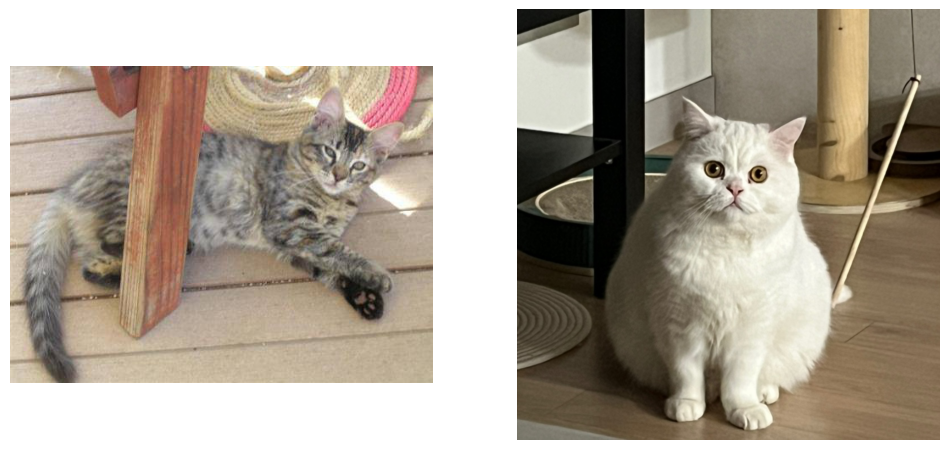

In [ ]:
from PIL import Image

img1 = Image.open('/content/cat.2010.jpg')
img2 = Image.open('white.png')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')

In [ ]:
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2).permute(1, 2, 0)
new_tensor = img2_input[:, :, :3].permute(2, 0, 1)

print(img1_input.shape, new_tensor.shape)

torch.Size([3, 224, 224]) torch.Size([3, 224, 224])


In [ ]:
test_batch = torch.stack([img1_input, new_tensor])
# test_batch = [img1_input, img2_input] 이렇게 하면 결과가 어떻게 나올까?

test_batch = test_batch.to(device)
test_batch.shape

torch.Size([2, 3, 224, 224])

In [ ]:
y_pred = model(test_batch)
y_pred

tensor([[2.3176e-04],
        [5.7652e-05]], device='cuda:0', grad_fn=<SigmoidBackward0>)

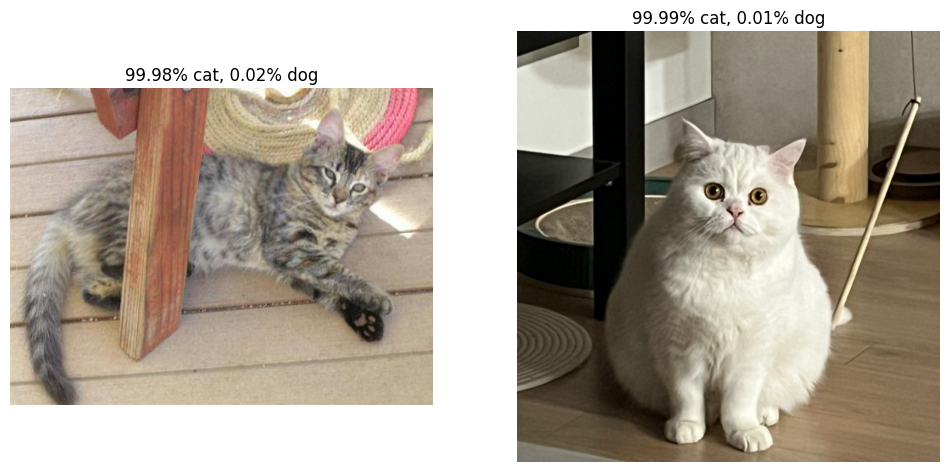

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title(f'{(1-y_pred[0, 0]) * 100:.2f}% cat, {y_pred[0, 0] * 100:.2f}% dog')
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].set_title(f'{(1-y_pred[1, 0]) * 100:.2f}% cat, {y_pred[1, 0] * 100:.2f}% dog')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()